In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
y_label = 0.5*x_data + 5 + noise

In [5]:
x_df = pd.DataFrame(x_data, columns=['X data'])

In [6]:
x_df.head()

,X data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [7]:
y_df = pd.DataFrame(y_label, columns=['Y'])

In [8]:
my_data = pd.concat([x_df, y_df], axis=1)

In [9]:
my_data.head()

,X data,Y
0,0.00000,4.588304
1,0.00001,5.404929
2,0.00002,3.465601
3,0.00003,4.349961
4,0.00004,5.067659


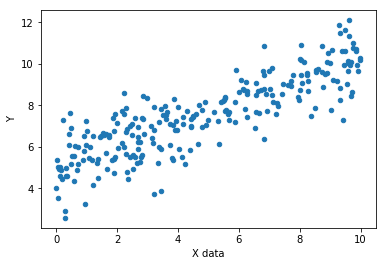

In [10]:
my_data.sample(n=250).plot(x = 'X data' , y = 'Y', kind = 'scatter')

## Now use tensorflow to find m and b

In [11]:
batch_size = 8

In [12]:
m = tf.Variable(0.81)
b = tf.Variable(0.61)

In [13]:
x = tf.placeholder(tf.float32, [batch_size])

In [14]:
y = tf.placeholder(tf.float32, [batch_size])

In [15]:
y_model = m*x + b

In [16]:
error = tf.reduce_sum(tf.square(y - y_model))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.003)

In [18]:
train = optimizer.minimize(error)

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 2000
    for i in range(batches):
        rand_index = np.random.randint(len(x_data), size=batch_size)
        sess.run(train, feed_dict={x:x_data[rand_index], y:y_label[rand_index]})
        
    final_slope, final_intercept = sess.run([m, b])

In [21]:
final_y = final_slope*x_data + final_intercept

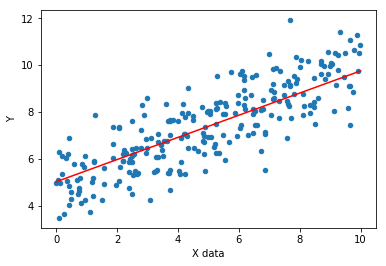

In [22]:
my_data.sample(250).plot(x = 'X data', y = 'Y', kind = 'scatter')
plt.plot(x_data, final_y, 'r')